## Scoping

### Project Goals

This project is designed to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that I have detemerined to be answered is that of whether


In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Preliminary Analysis

### Loading the Data

The first step I take is to load the provided data into a pandas DataFrame object so that it can be efficiently explored and manipulated in python.

First the file `profiles.csv` is loaded into the `p` DataFrame (simple I know but I prefer this over repeatedly typing out a name). It is subsequently displayed for examination.

In [251]:
p = pd.read_csv('profiles.csv', encoding = 'utf-8')
p.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Identifying the Data Characteristics

First it is advisable to look at the data types and columns presented to us in the data and determine how much data we are dealing with exactly.

Doing a few simple calls to variables of the dataframe reveals that our dating profiles data consists of 59,946 rows (or users) and 31 attributes/columns.

Additionally confering with the above table we can see that there are a few columns with the `object` dtype that might be better classified as strings so they could potentially undergoe string operations in the future if need be.

In [252]:
p = p.convert_dtypes() #added after determining object attributes would be better served as strings. #This also reveals that height has no need to be a float
print(f'Data types:\n{p.dtypes}')
print(f'Datasize: {p.shape}')

Data types:
age                     Int64
body_type      string[python]
diet           string[python]
drinks         string[python]
drugs          string[python]
education      string[python]
essay0         string[python]
essay1         string[python]
essay2         string[python]
essay3         string[python]
essay4         string[python]
essay5         string[python]
essay6         string[python]
essay7         string[python]
essay8         string[python]
essay9         string[python]
ethnicity      string[python]
height                  Int64
income                  Int64
job            string[python]
last_online    string[python]
location       string[python]
offspring      string[python]
orientation    string[python]
pets           string[python]
religion       string[python]
sex            string[python]
sign           string[python]
smokes         string[python]
speaks         string[python]
status         string[python]
dtype: object
Datasize: (59946, 31)


In [253]:
p.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

### Visualising Variation Across Attributes

However we know what sort of things can be expected in our columns we don't know what exact sort of values we can expect. Thus I examine the value counts of several columns.

BUT there is no point in looking at the value counts of the `essay{number}` columns as they are more likely infinitely variable and will not have any repeating entries. Also now that I think about it there is no reasons to keep them as this project doesn't involve NLP.

In [254]:
essays = [f'essay{i}' for i in range(0, 10, 1)]
p.drop(essays, axis = 1, inplace = True)

### Age and Sex Variation

Age is slightly normaly distributed with a rightward skew. This is expected as you would expect more young people to use dating websites or applications.

We also see we have a huge impossible outlier from our `.describe` function (There are only about 150 to 450 supercentenarians in the world, I doubt they are signing up for dating sites) so perhaps some cleaning of these outliers will mean better representitive data. Let's just remove everyone over 100.

NOTE: PUT THIS DOWN AS AN ASSUMPTION

The majority of our participants fall in the 23 - 41 age range and we have a lot more men then women!

In [255]:

#sex is catagorical so a value_counts provides the most info (we already know the sex column contains no nulls)
print(p['sex'].value_counts())

#age is numerical so describe should give us a good idea of the distribution of the values (we already know the age column contains no nulls)
p['age'].describe()

sex
m    35829
f    24117
Name: count, dtype: Int64


count     59946.0
mean     32.34029
std      9.452779
min          18.0
25%          26.0
50%          30.0
75%          37.0
max         110.0
Name: age, dtype: Float64

In [256]:
#ages above 100 are removed
p = p[p["age"] <= 100]
p['age'].describe() #resulting distribution looks a lot more realistic

count      59944.0
mean     32.337715
std       9.442423
min           18.0
25%           26.0
50%           30.0
75%           37.0
max           69.0
Name: age, dtype: Float64

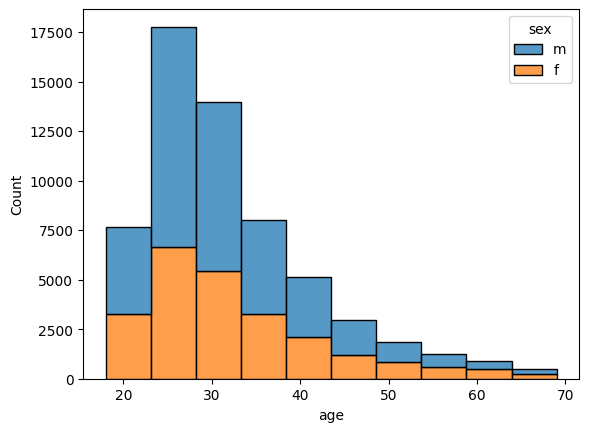

In [257]:
sns.histplot(data = p, x = "age", hue = 'sex', binwidth = 5,  multiple = 'stack') #a histogram will give us a good visual of the distribution of both age and gender
plt.show()

### Handling Body Type Nulls

All nulls in the body type column are replaced with average. This is done as the majority of people would have the average body type anyway.

Note: Think about this assumption more critically.

Note: This is an assumption, put it in the assumptions section

In [258]:
p['body_type'] = p['body_type'].fillna('average')

### Body Type Variation

As we can see most people on the site consider themselves to be either average or fit/athletic, you would expect this as most people with societaly dictated "negative" body type would not be confident enough to be on a dating website or less likely to report this feature of themselves accurately. 

In [259]:
p['body_type'].value_counts(dropna = False)

body_type
average           19947
fit               12711
athletic          11818
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: Int64

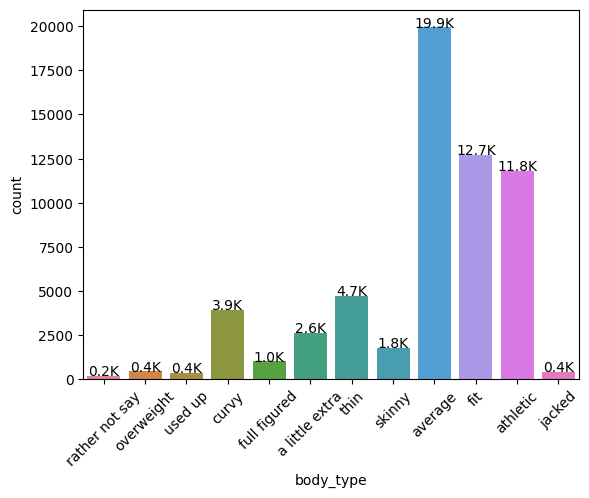

In [260]:
#My order is based on my own determination of a logical order for the available values for body_type based on my own perception of less fit to most fit
my_order = ['rather not say', 'overweight', 'used up', 'curvy', 'full figured', 'a little extra', 'thin', 'skinny', 'average', 'fit', 'athletic', 'jacked']
ax = sns.countplot(data = p, x = 'body_type', hue = 'body_type', order = my_order, hue_order = my_order)

#Just wanted to put in the count values on top of each bar so as to better interpret the data for ease of interpretability. This is all done in 1000s points for fit.
for axi in ax.patches:
    height = axi.get_height()
    ax.text(axi.get_x()+axi.get_width()/2.,
            height + 3,
            f'{round(axi.get_height() / 1000, 1)}K',
            ha="center")

#rotate labels for no overlap     
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.show()

### Handling Diet Null

So when we look at the diet data we see that a wopping 68% of the data is NA so our users didnt specify diet data.

1.Let's check if the diet values are MNAR


ValueError: could not convert string to float: 'a little extra'

### Diet Variation

Most people on the site expectedly have little to no dietary restriction or preference. Neglibile amounts of people on the dating site conform to religious diets (Maybe our site isn't that appealling to a religious audience)

In [ ]:
p['diet'].value_counts(dropna= False)

diet
<NA>                   24394
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1006
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: Int64

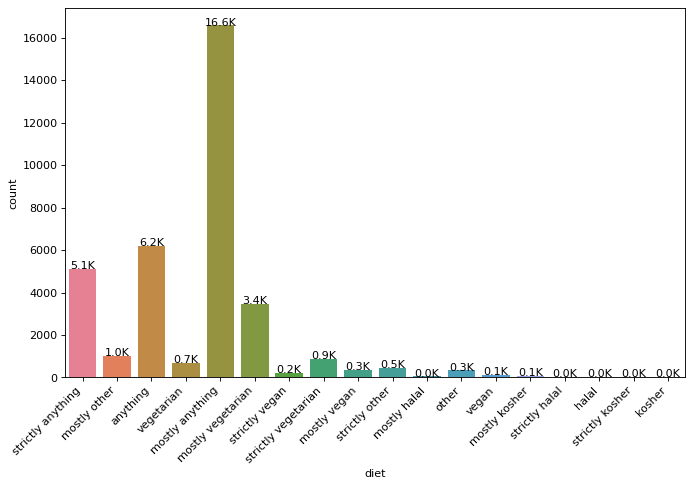

In [ ]:
plt.figure(figsize=(10,6), dpi=80)

ax = sns.countplot(data = p, x = 'diet', hue = 'diet')

#Just wanted to put in the count values on top of each bar so as to better interpret the data for ease of interpretability. This is all done in 1000s points for fit.
for axi in ax.patches:
    height = axi.get_height()
    ax.text(axi.get_x()+axi.get_width()/2.,
            height + 3,
            f'{round(axi.get_height() / 1000, 1)}K',
            ha="center")

#rotate labels for no overlap     
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, ha = "right", x = -0.1)

plt.show()

### Drink and Drugs Variation

In [ ]:
print(p['drugs'].value_counts(), "\n")
print(p['drinks'].value_counts())

drugs
never        37723
sometimes     7732
often          410
Name: count, dtype: Int64 

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: Int64


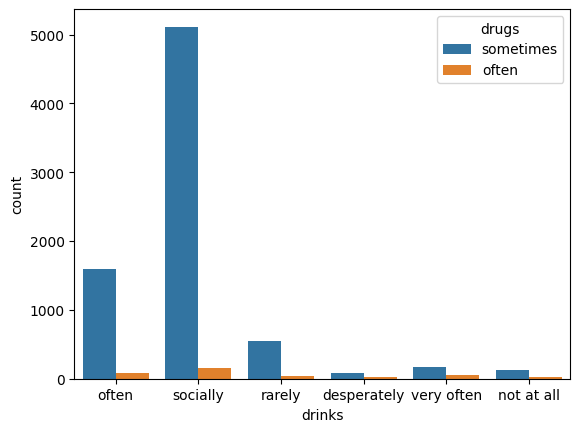

In [ ]:
ax = sns.countplot(data = p[p['drugs'] != 'never'], x = 'drinks', hue = 'drugs', )
plt.show()

### Education Variation

This attribute is need of serious cleaning!
Lets put it into descrete catagoies

In [ ]:
edu_desc = p['education'].describe()
print(edu_desc)
p['education'].value_counts()

count                                 53317
unique                                   32
top       graduated from college/university
freq                                  23959
Name: education, dtype: object


education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1682
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

#### Clean Education

I want to clean up education instead of having 32 unique values we can split the info into two columns and get a lot cleaner dataset.

In [ ]:
def replacer(lst, x):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
    else:
        return 'no education'
        

In [ ]:
edu = ['space camp', 'high school', 'two-year college', 'college/university', 'law school', 'med school', 'masters', 'ph.d']
p['education_level'] = p['education'].apply(lambda x: replacer(edu, x))
p['education_level'].value_counts(dropna = False)

education_level
college/university    31467
masters               10919
no education           6627
two-year college       3018
ph.d                   2408
high school            1713
space camp             1683
law school             1428
med school              681
Name: count, dtype: int64

In [ ]:
def replacer2(lst, x):
    if isinstance(x, str):
        for l in lst:

            if l.lower() in x.lower():
                return l
            else:
                return 'graduated'
    else:
        return 'no education'

In [ ]:
edu = ['dropped out', 'working on', 'graduated']

p['education_status'] = p['education'].apply(lambda x: replacer2(edu, x))
p['education_status'].value_counts(drop_na = False)

TypeError: IndexOpsMixin.value_counts() got an unexpected keyword argument 'drop_na'